<a href="https://colab.research.google.com/github/Gumm11/Gumm11/blob/main/Monkey_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vovellaa","key":"65df647cc5f1e1c919d3b43a6becfe19"}'}

In [2]:
!pip install kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d slothkong/10-monkey-species

!unzip 10-monkey-species.zip -d ./monkey_species

Dataset URL: https://www.kaggle.com/datasets/slothkong/10-monkey-species
License(s): CC0-1.0
100% 545M/547M [00:23<00:00, 125MB/s]
100% 547M/547M [00:23<00:00, 24.1MB/s]
Archive:  10-monkey-species.zip
  inflating: ./monkey_species/monkey_labels.txt  
  inflating: ./monkey_species/training/training/n0/n0018.jpg  
  inflating: ./monkey_species/training/training/n0/n0019.jpg  
  inflating: ./monkey_species/training/training/n0/n0020.jpg  
  inflating: ./monkey_species/training/training/n0/n0021.jpg  
  inflating: ./monkey_species/training/training/n0/n0022.jpg  
  inflating: ./monkey_species/training/training/n0/n0023.jpg  
  inflating: ./monkey_species/training/training/n0/n0024.jpg  
  inflating: ./monkey_species/training/training/n0/n0025.jpg  
  inflating: ./monkey_species/training/training/n0/n0026.jpg  
  inflating: ./monkey_species/training/training/n0/n0027.jpg  
  inflating: ./monkey_species/training/training/n0/n0028.jpg  
  inflating: ./monkey_species/training/training/n0/n002

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os

In [7]:
train_dir = os.path.join('monkey_species', 'training/training')
validation_dir = os.path.join('monkey_species', 'validation/validation')

In [8]:
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True)

val_ds = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True)

class_names = train_ds.class_names
print("Class names:", class_names)

Found 1097 files belonging to 10 classes.
Found 272 files belonging to 10 classes.
Class names: ['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

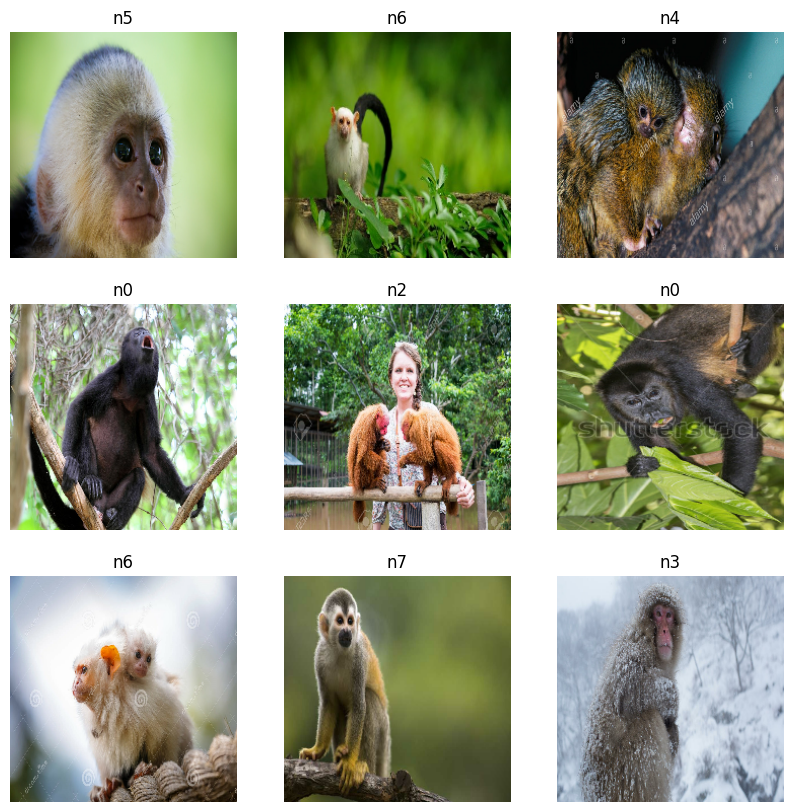

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    images_np = images.numpy()
    labels_np = labels.numpy()
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images_np[i].astype("uint8"))
        plt.title(class_names[labels_np[i]])
        plt.axis("off")

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    min_lr=1e-5
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=[early_stop, lr_reduce]
)

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.1311 - loss: 2.3114 - val_accuracy: 0.2279 - val_loss: 2.1561 - learning_rate: 3.0000e-05
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 127s 3s/step - accuracy: 0.3057 - loss: 2.0635 - val_accuracy: 0.2978 - val_loss: 1.9895 - learning_rate: 3.0000e-05
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.3956 - loss: 1.8428 - val_accuracy: 0.3162 - val_loss: 1.8652 - learning_rate: 3.0000e-05
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.4668 - loss: 1.6528 - val_accuracy: 0.3566 - val_loss: 1.7480 - learning_rate: 3.0000e-05
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.5576 - loss: 1.4568 - val_accuracy: 0.3897 - val_loss: 1.6531 - learning_rate: 3.0000e-05
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.6253 - loss: 1.2899 - val_accuracy: 0.4338 - val_loss: 1.5768 - learning_rate: 3.0000e-05
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.6903 

In [ ]:
loss, accuracy = model.evaluate(val_ds)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np

for images, labels in val_ds.take(1):
    images_np = images.numpy()
    labels_np = labels.numpy()
    break

predictions = model.predict(images_np)
predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images_np[i].astype("uint8"))
    true_label = class_names[labels_np[i]]
    predicted_label = class_names[predicted_classes[i]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis("off")